#### Rainfall Prediction - Weather Forecasting

by - Sajad Abdul Manaf

<b>Problem Statement<b>

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
    
    1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

Dataset link - https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

##### Dataset Import, Data Wrangling, Data Cleaning

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 8425
No of Columns: 23


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

- Date is marked as an object data type, this needs to be type converted
- Rainfall is one of the target variable - which is contunous in nature - Regression Problem, also, Rain tomorrow predition is a classification problem, so we need to build two types algorothms

In [7]:
# Dtata type close check
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

- Most of the data types are of Object and Floast Datatypes, we need to convert Date  variable to neumeric type, if the feature is relevant in prediction

In [8]:
#checking the unique values in Dataframe
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

- Null Value Check

- Duplicate value Check

In [10]:
df.duplicated().sum()

1663

There are 1663 duplicate values which can be deleted

- Any special character check

In [12]:
df.isin([' ?']).sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

- Date Type conversion

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [8]:
#Extracting Day from Date_of_journey column
df['Day'] = pd.to_datetime(df.Date,format="%d/%m/%Y").dt.day

#Extracting Month from Date_of_journey column
df['Month'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.month

#Extracting Year from Date_of_journey column
df['Year'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.year

In [9]:
df.drop(columns=['Date'],axis=1,inplace=True)

In [17]:
df.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008


In [18]:
df.duplicated().sum()

1663

In [19]:
df.isin([' ','NA','-']).sum().any()

False

- Treating NUll values by imputation

In [10]:
#Filling NaN's in feature MinTemp with mean
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

#Filling NaN's in feature MaxTemp with mean
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

#Filling NaN's in feature Rainfall with mode, as most of the rows have 0 rainfall.
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])

#Filling NaN's in feature Evaporation with mean
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())

#Filling NaN's in feature Sunshine with mean
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())

#Filling NaN's in feature WindGustDir with mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

#Filling NaN's in feature WindGustSpeed with mean
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

#Filling NaN's in feature WindDir9am with mode
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

#Filling NaN's in feature WindDir3pm with mode
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

#Filling NaN's in feature WindSpeed9am with mean
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

#Filling NaN's in feature WindSpeed3pm with mean
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

#Filling NaN's in feature Humidity9am with mean
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

#Filling NaN's in feature Humidity3pm with mean
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

#Filling NaN's in feature Pressure9am with mean
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())

#Filling NaN's in feature Pressure3pm with mean
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

#Filling NaN's in feature Cloud9am with mean
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())

#Filling NaN's in feature Cloud3pm with mean
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

#Filling NaN's in feature Temp9am with mean
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())

#Filling NaN's in feature Temp3pm with mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling NaN's in feature Temp3pm with mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling NaN's in feature RainToday with mode
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

#Filling NaN's in feature RainTomorrow with mode
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [11]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [22]:
df.duplicated().sum()

1663

- Afer imputation also we can see 1663 duplicate records which needs to be deleted

<AxesSubplot:>

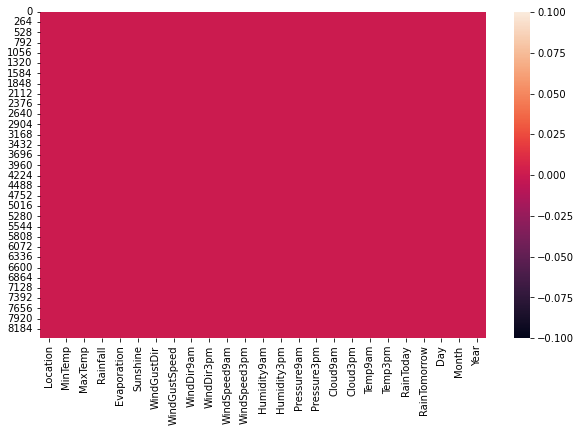

In [24]:
#Missing Value Displaying
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [12]:
df.drop_duplicates(keep='last', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6762 non-null   object 
 1   MinTemp        6762 non-null   float64
 2   MaxTemp        6762 non-null   float64
 3   Rainfall       6762 non-null   float64
 4   Evaporation    6762 non-null   float64
 5   Sunshine       6762 non-null   float64
 6   WindGustDir    6762 non-null   object 
 7   WindGustSpeed  6762 non-null   float64
 8   WindDir9am     6762 non-null   object 
 9   WindDir3pm     6762 non-null   object 
 10  WindSpeed9am   6762 non-null   float64
 11  WindSpeed3pm   6762 non-null   float64
 12  Humidity9am    6762 non-null   float64
 13  Humidity3pm    6762 non-null   float64
 14  Pressure9am    6762 non-null   float64
 15  Pressure3pm    6762 non-null   float64
 16  Cloud9am       6762 non-null   float64
 17  Cloud3pm       6762 non-null   float64
 18  Temp9am 

- Stastical Analysis

In [28]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.110016,24.096335,2.723410,5.339977,7.767098,39.144388,12.792133,17.585384,67.509082,50.478258,1017.629004,1015.142442,4.400224,4.372235,17.894035,22.704947,15.737208,6.462141,2012.052203
std,5.540673,6.130161,10.490138,3.343991,2.736693,13.382876,9.788112,9.549341,17.182723,18.498573,6.027916,5.967815,2.476781,2.324720,5.722423,5.971925,8.793898,3.377471,2.301057
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.000000,19.600000,0.000000,4.000000,7.632205,30.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000,8.000000,4.000000,2010.000000
50%,13.193305,23.500000,0.000000,5.389395,7.632205,39.000000,11.000000,17.000000,68.000000,50.000000,1017.640233,1015.236075,4.566622,4.503183,17.900000,22.300000,16.000000,6.000000,2012.000000
75%,17.400000,28.400000,0.800000,5.389395,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


- Splitting up Categorical ane Neumeric Columns

In [14]:
#List of categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

#List of Neumeric Columns

# checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


#### Univeriate Analysis -Categprical Features

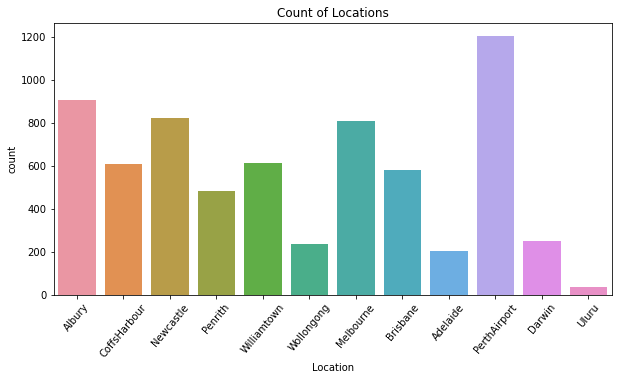

In [32]:
# Visualizing the various Locations present in the dataset
plt.figure(figsize=(10,5))
sns.countplot(df["Location"])
plt.title("Count of Locations")
plt.xticks(rotation=50)
plt.show()

- Max data from Melbourne and lowest in Uluru

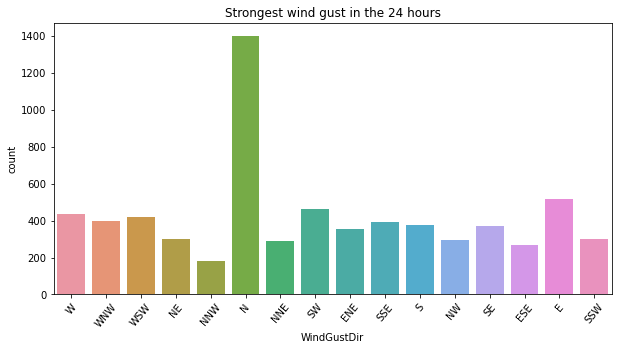

In [35]:
# Visualize the direction of the strongest wind gust in the 24 hours to midnight
plt.figure(figsize=(10,5))
sns.countplot(df["WindGustDir"])
plt.title("Strongest wind gust in the 24 hours")
plt.xticks(rotation=50)
plt.show()

- WinsGustDir is strongest towards North and least towards NNW

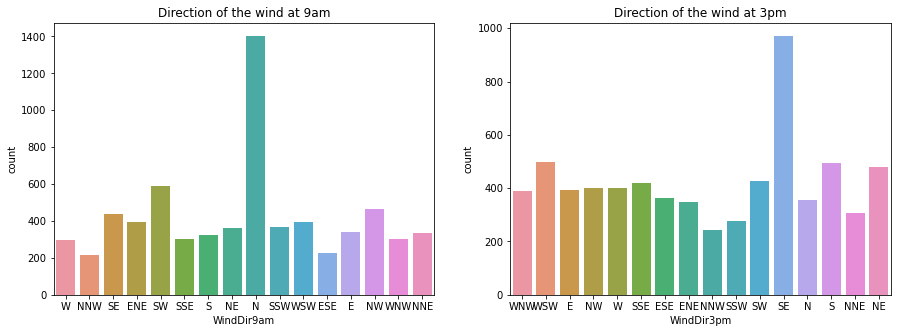

In [37]:
#Visualization of wind at 9 am and 3pm.
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Direction of the wind at 9am')
sns.countplot(df['WindDir9am'])
plt.subplot(1,2,2)
plt.title('Direction of the wind at 3pm')
sns.countplot(df['WindDir3pm'])
plt.show()

- Obs - The wind direction was towards the N at 9am and in the SE at 3pm

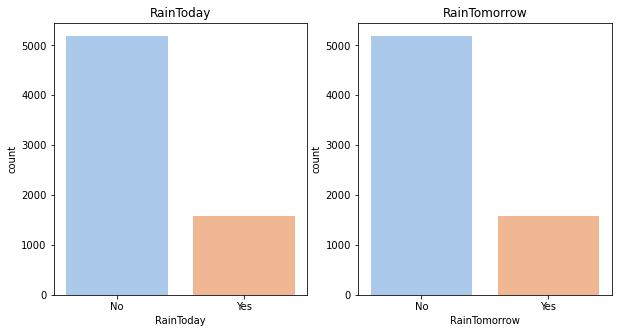

In [38]:
#Visualization of Rainfall today and tomorrow:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('RainToday')
sns.countplot(df['RainToday'],palette='pastel')
plt.subplot(1,2,2)
plt.title('RainTomorrow')
sns.countplot(df['RainTomorrow'], palette='pastel')
plt.show()

- Rain tomorrow is target feature, and this seems to be imbalanced and we need to balance it

- Neumerical Columns Visualization

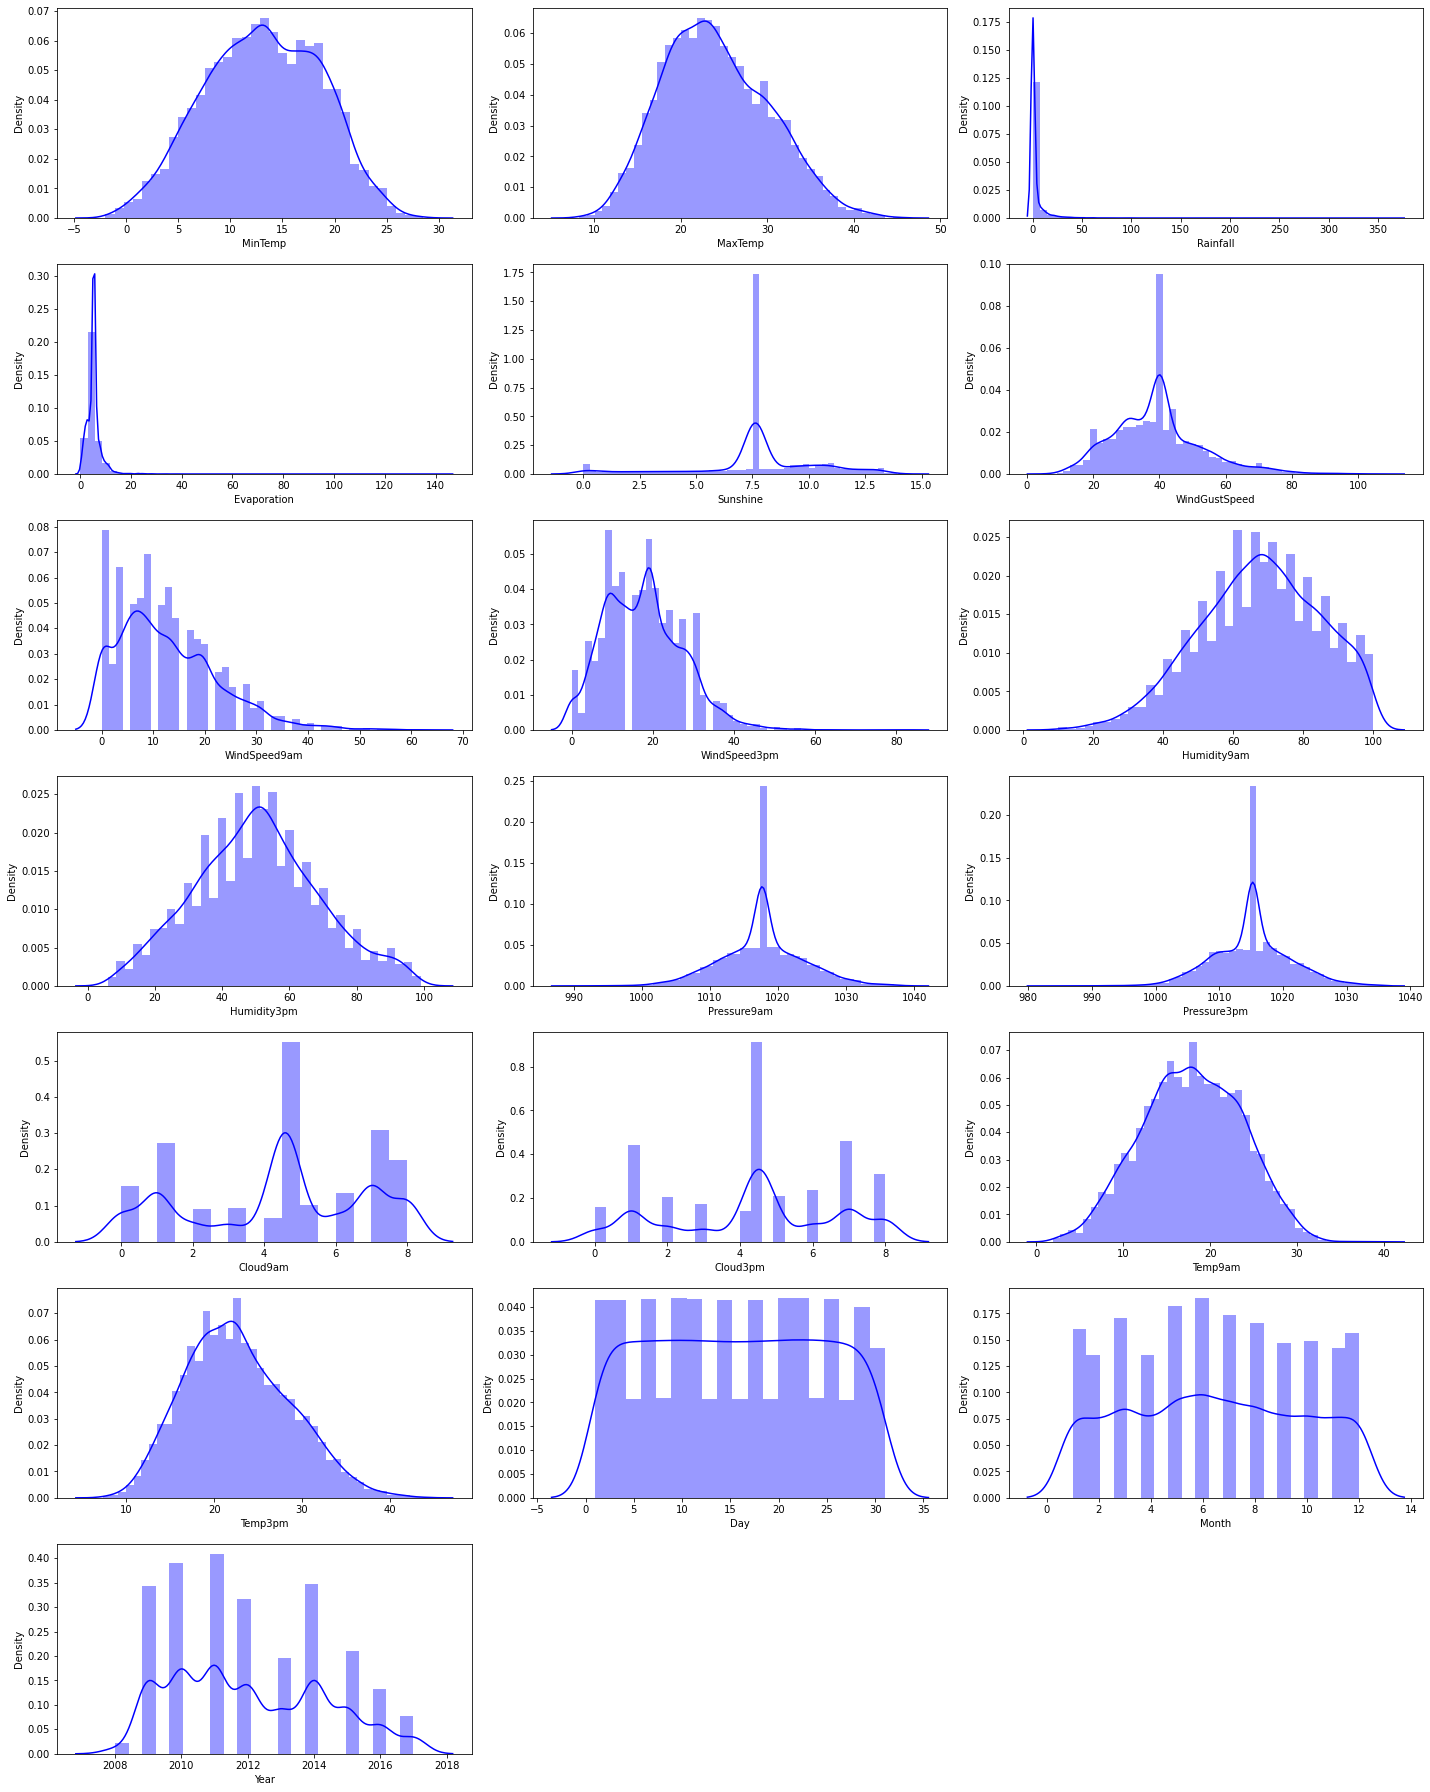

In [40]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Observations:

- At high level,  we can say that the dataset is not normally distributed.
- Min Temp is normally distributed
- Max Temp, Rainfall, Evaporation, WindGustSpeed, WindSpeed9am,WindSpeed3pm - slightly skewed right
- Humidity9am is slightly skewed left and Humidity3pm is normally distributed.
- Sunshine is not normally distributed

#### Bivariate Analysis

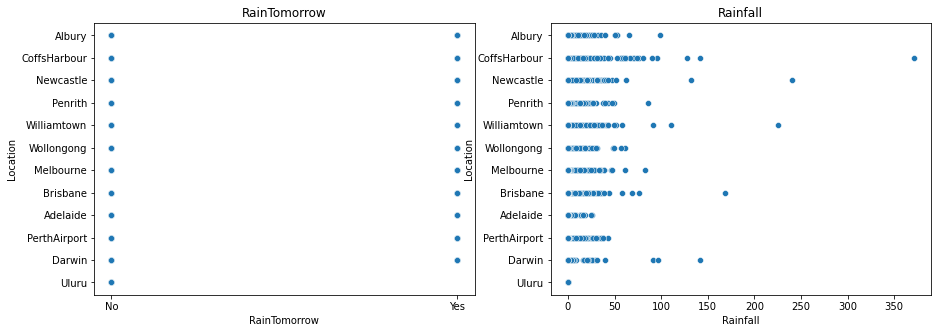

In [41]:
#checking the relation between location with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='Location',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='Location',data=df)
plt.show()

We can see that location does not have any major influence on the prediction of rainfall, but lets keep the feature

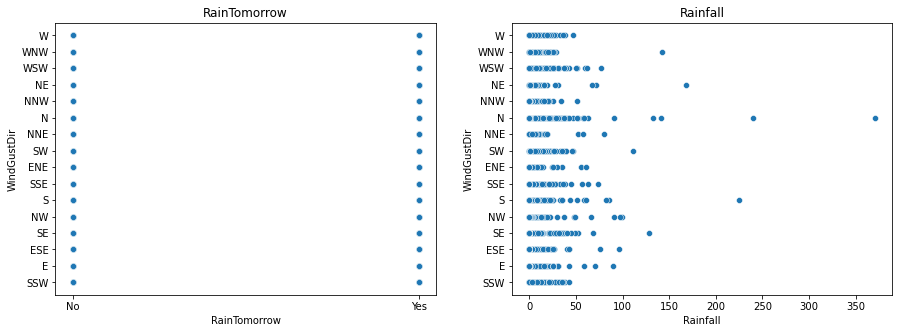

In [42]:
#checking the relation between WindGustDir with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='WindGustDir',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=df)
plt.show()

- No specific relationship with the target

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

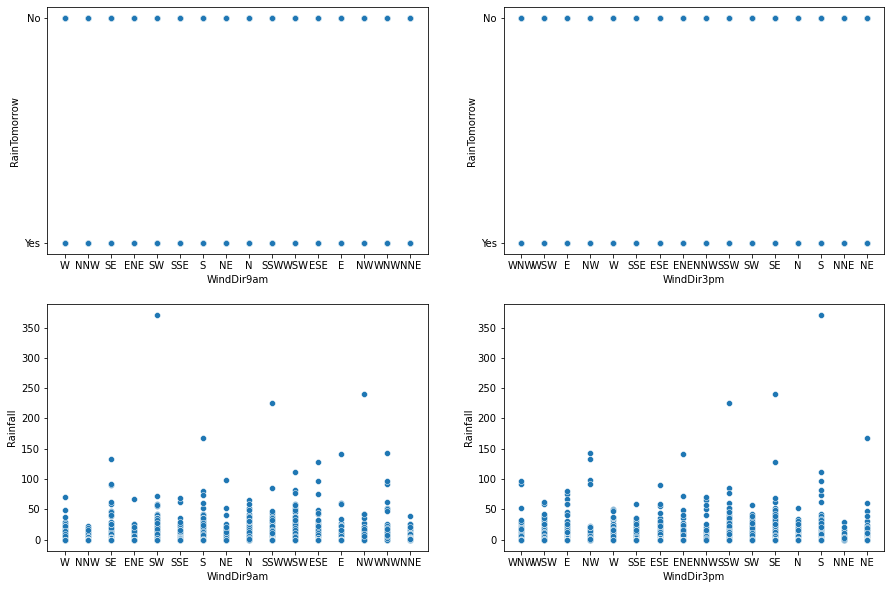

In [43]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindDir9am and RainTomorrow
sns.scatterplot(x='WindDir9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and RainTomorrow
sns.scatterplot(x='WindDir3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindDir9am and Rainfall
sns.scatterplot(x='WindDir9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and Rainfall
sns.scatterplot(x='WindDir3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

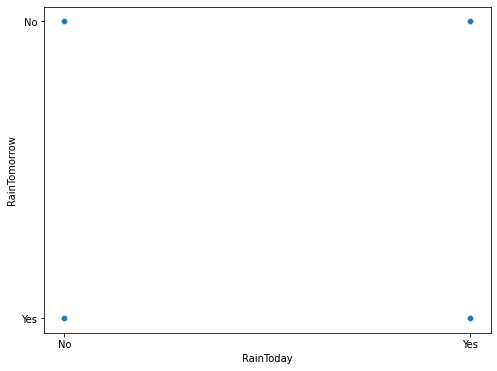

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['RainToday'],y=df['RainTomorrow'])
plt.show()

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

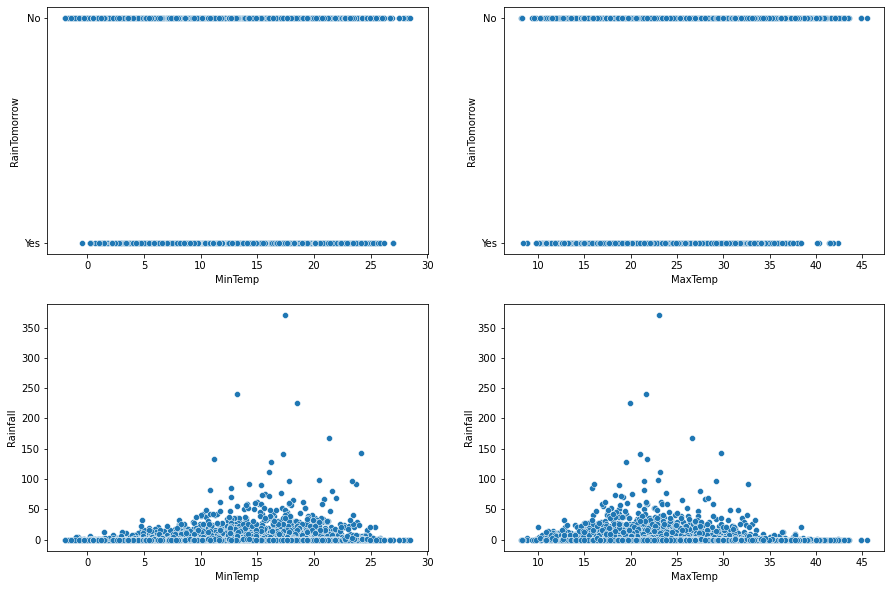

In [45]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between minimum temperature and RainTomorrow
sns.scatterplot(x='MinTemp',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between max temperature and RainTomorrow
sns.scatterplot(x='MaxTemp',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between minimum temperature and Rainfall
sns.scatterplot(x='MinTemp',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between max temperature and Rainfall
sns.scatterplot(x='MaxTemp',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

- Cant establish an relationship with the above features

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

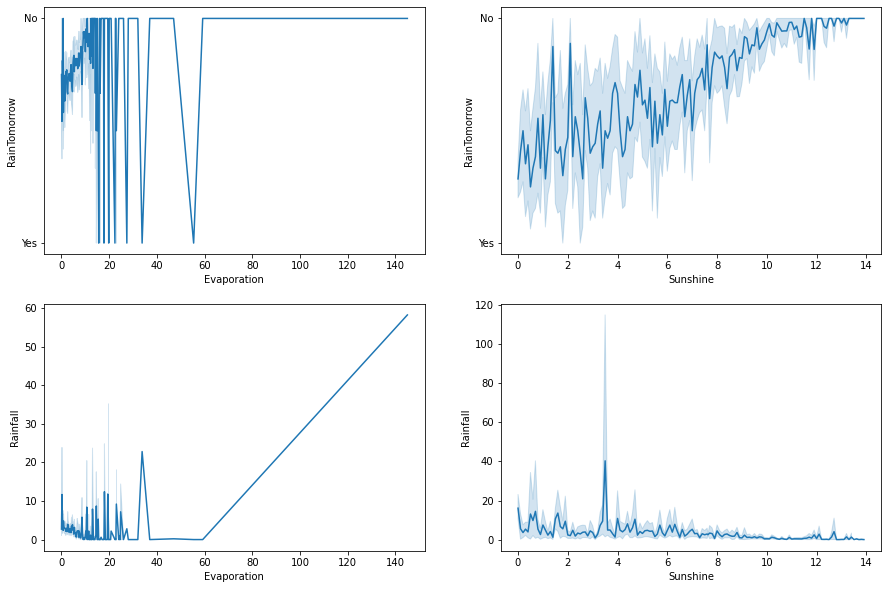

In [46]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Evaporation and RainTomorrow
sns.lineplot(x='Evaporation',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Sunshine and RainTomorrow
sns.lineplot(x='Sunshine',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Evaporation and Rainfall
sns.lineplot(x='Evaporation',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Sunshine and Rainfall
sns.lineplot(x='Sunshine',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

- Both Evaporation and Sunshine is having a positive relationship with the targer features

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

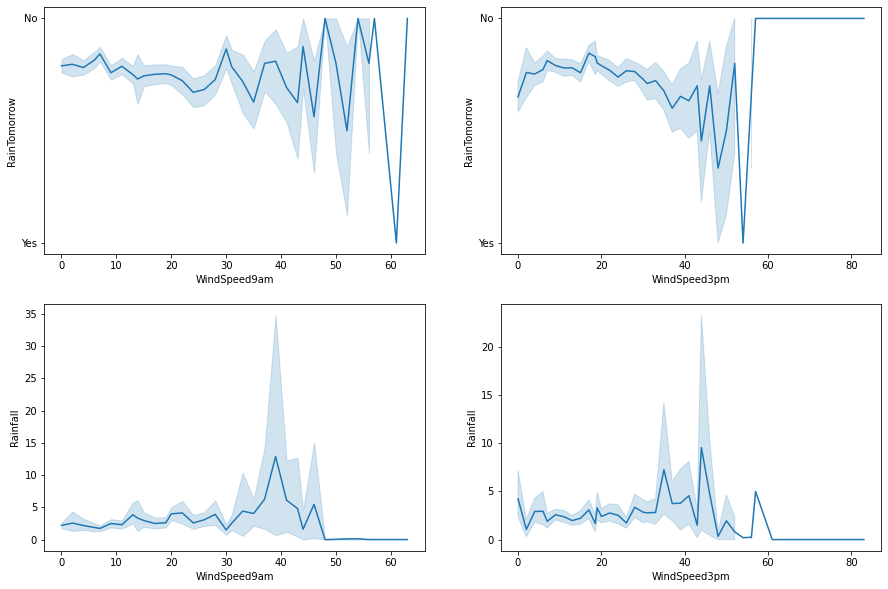

In [47]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindSpeed9am and RainTomorrow
sns.lineplot(x='WindSpeed9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and RainTomorrow
sns.lineplot(x='WindSpeed3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindSpeed9am and Rainfall
sns.lineplot(x='WindSpeed9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and Rainfall
sns.lineplot(x='WindSpeed3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

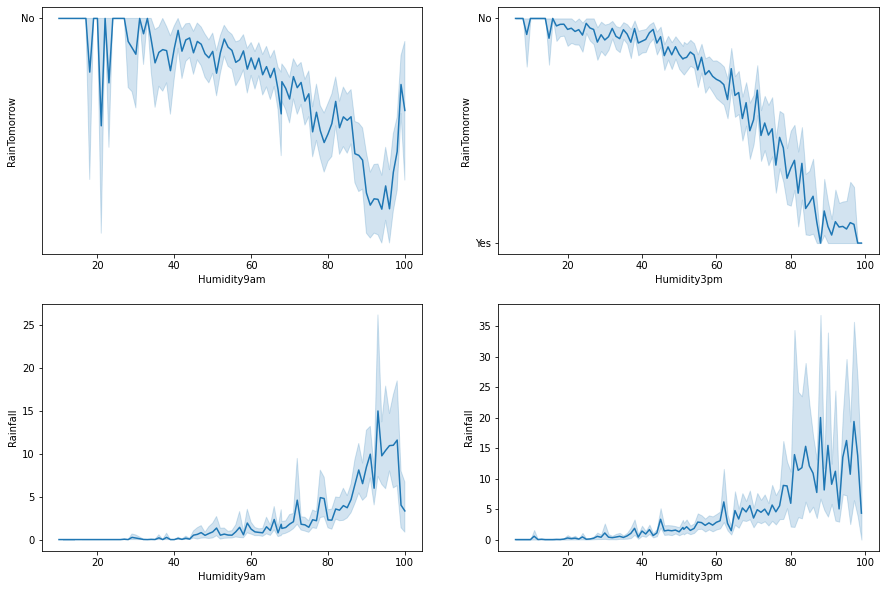

In [48]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Humidity9am and RainTomorrow
sns.lineplot(x='Humidity9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and RainTomorrow
sns.lineplot(x='Humidity3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Humidity9am and Rainfall
sns.lineplot(x='Humidity9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and Rainfall
sns.lineplot(x='Humidity3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

- Negative realationship for RainTomorrow, and Humidity9am and Humidity 3pm
- postive relationship between Rainfall, and Humidity9am and Humidity 3pm

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

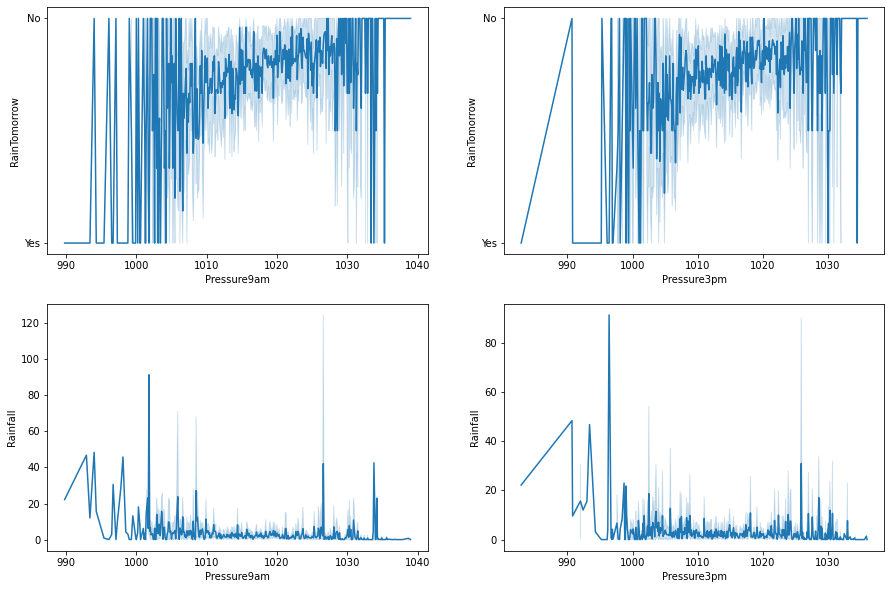

In [49]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Pressure9am and RainTomorrow
sns.lineplot(x='Pressure9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Pressure3pm and RainTomorrow
sns.lineplot(x='Pressure3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Pressure9am and Rainfall
sns.lineplot(x='Pressure9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Pressure3pm and Rainfall
sns.lineplot(x='Pressure3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

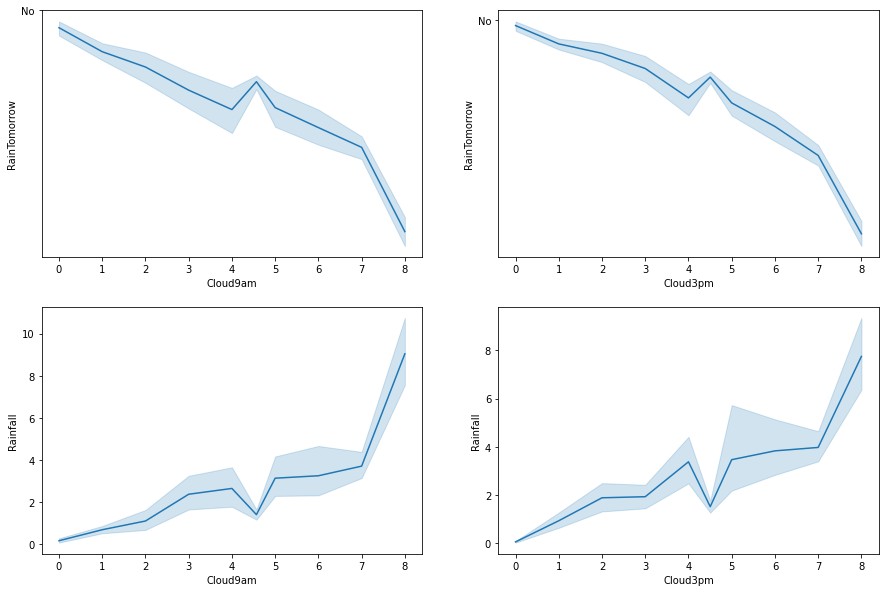

In [50]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Cloud9am and RainTomorrow
sns.lineplot(x='Cloud9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Cloud3pm and RainTomorrow
sns.lineplot(x='Cloud3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Cloud9am and Rainfall
sns.lineplot(x='Cloud9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Cloud3pm and Rainfall
sns.lineplot(x='Cloud3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

- Rain Tomorrow Feature is having negative relationship with Cloud9am, Cloud3pm
- Rainfall is having Positive Relationship with Cloud9am, Cloud3pm

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

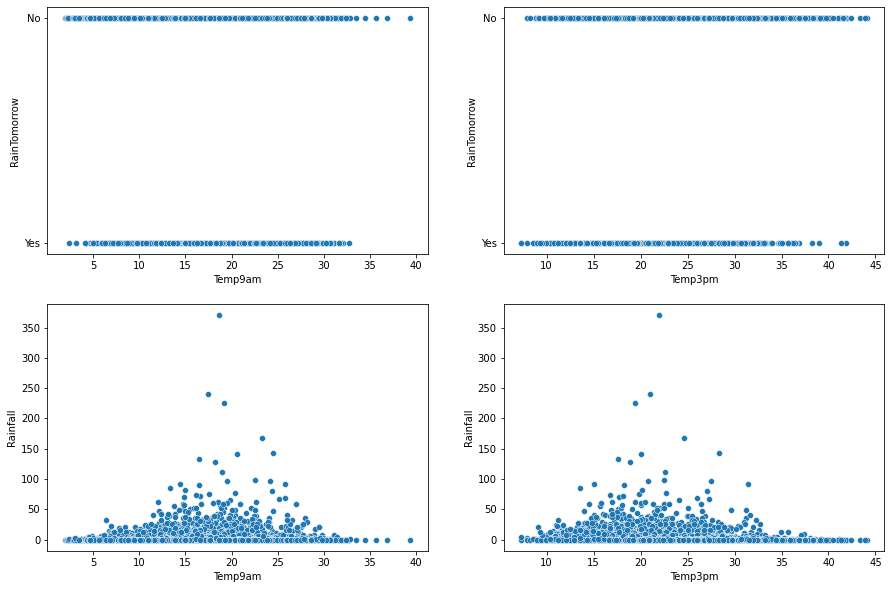

In [52]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Temp9am and RainTomorrow
sns.scatterplot(x='Temp9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and RainTomorrow
sns.scatterplot(x='Temp3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Temp9am and Rainfall
sns.scatterplot(x='Temp9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and Rainfall
sns.scatterplot(x='Temp3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

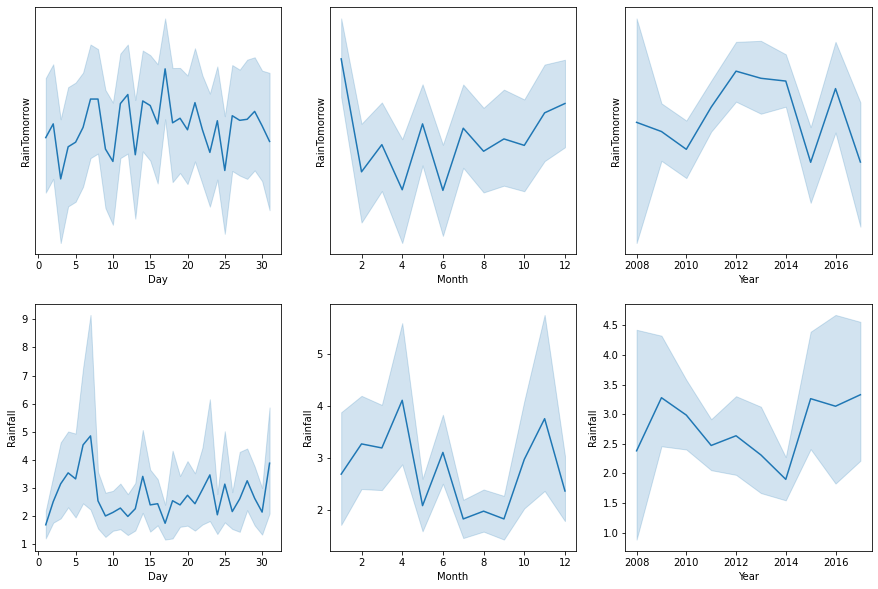

In [53]:
fig,axes=plt.subplots(2,3,figsize=(15,10))

#checking the relation between Day and RainTomorrow
sns.lineplot(x='Day',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between Month and RainTomorrow
sns.lineplot(x='Month',y='RainTomorrow',ax=axes[0,1],palette="green",data=df)

#checking the relation between Year and RainTomorrow
sns.lineplot(x='Year',y='RainTomorrow',ax=axes[0,2],palette="green",data=df)

#checking the relation between Day and Rainfall
sns.lineplot(x='Day',y='Rainfall',ax=axes[1,0],palette="purple",data=df)

#checking the relation between Month and Rainfall
sns.lineplot(x='Month',y='Rainfall',ax=axes[1,1],palette="purple",data=df)

#checking the relation between Year and Rainfall
sns.lineplot(x='Year',y='Rainfall',ax=axes[1,2],palette="purple",data=df)

- rest all having no relationships with targets

#### Outliers

In [1]:
# Identifying the outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(3,7,plotnumber)
        sns.boxplot(data= df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

NameError: name 'plt' is not defined

outliers present in : MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am,Windspeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, Temp3pm

- <b>Outliers Treatments<b>

In [16]:
from scipy.stats import zscore

feature = df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]


z=np.abs(zscore(feature))

z

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0.195170,0.202435,0.014779,0.049294,0.362850,0.736444,0.671784,0.203179,1.647292,1.347736,0.173722,0.151545
1,0.163738,0.259635,0.014779,0.049294,0.362850,0.898312,0.462330,1.368283,1.166162,1.230431,0.121292,0.267112
2,0.261622,0.259635,0.014779,0.049294,0.512305,0.634272,0.881238,1.717496,1.663883,1.079611,0.542811,0.082903
3,0.636844,0.259635,0.014779,0.049294,1.131708,0.183106,0.899122,1.310080,0.004812,0.392542,0.035995,0.635529
4,1.338345,0.164301,0.014779,0.049294,0.138666,0.591796,0.252876,0.843405,1.132980,1.532071,0.016434,1.171410
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,0.113600,0.259635,0.014779,0.049294,0.608613,0.021238,0.689668,0.960867,1.156538,0.864293,1.362117,0.051067
8421,0.196366,0.259635,0.014779,0.049294,1.281164,0.021238,0.899122,0.669855,0.974040,0.663199,1.222306,0.300604
8422,0.457390,0.259635,0.014779,0.049294,0.160246,0.387451,0.899122,0.844462,0.559272,0.277770,0.942683,0.568544
8423,0.473704,0.259635,0.014779,0.049294,0.832796,0.021238,1.108576,0.960867,0.293821,0.227497,0.488297,0.551798


In [17]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


-Percentage Data Loss

In [18]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", new_df.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-new_df.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (6762, 25)
Shape of the dataframe after removing outliers:  (6407, 25)
Percentage of data loss post outlier removal:  5.249926057379473


- Percentage Data loss is less than 10, so lets proceed further

In [19]:
new_df.skew().sort_values()

Sunshine        -0.745663
Cloud9am        -0.278808
Humidity9am     -0.233630
Cloud3pm        -0.212133
MinTemp         -0.079106
Temp9am         -0.071385
Day              0.004932
Month            0.032783
Pressure9am      0.062624
Pressure3pm      0.078028
Humidity3pm      0.154806
MaxTemp          0.266904
Temp3pm          0.291970
WindSpeed3pm     0.336064
Year             0.352752
WindGustSpeed    0.433805
Evaporation      0.666033
WindSpeed9am     0.673685
Rainfall         3.521311
dtype: float64

its seen that features, Sunshine, Rainfall, Evaporation, Windspeed9am has skewness.

In [20]:
new_df["Sunshine"] = np.log1p(new_df["Sunshine"])
new_df["Rainfall"] = np.log1p(new_df["Rainfall"])
new_df["Evaporation"] = np.log1p(new_df["Evaporation"])
new_df["WindSpeed9am"] = np.log1p(new_df["WindSpeed9am"])
new_df["WindGustSpeed"] = np.log1p(new_df["WindGustSpeed"])

In [21]:
new_df.skew().sort_values()

Sunshine        -2.644650
WindSpeed9am    -1.059502
Evaporation     -1.042515
WindGustSpeed   -0.602223
Cloud9am        -0.278808
Humidity9am     -0.233630
Cloud3pm        -0.212133
MinTemp         -0.079106
Temp9am         -0.071385
Day              0.004932
Month            0.032783
Pressure9am      0.062624
Pressure3pm      0.078028
Humidity3pm      0.154806
MaxTemp          0.266904
Temp3pm          0.291970
WindSpeed3pm     0.336064
Year             0.352752
Rainfall         1.838505
dtype: float64

#### Encoding Categorical Columns using Label Encopding

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df[cat_col]= new_df[cat_col].apply(le.fit_transform)
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.470004,1.85464,2.1555,13,3.806662,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.000000,1.85464,2.1555,14,3.806662,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.000000,1.85464,2.1555,15,3.850148,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.000000,1.85464,2.1555,4,3.218876,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,0.693147,1.85464,2.1555,13,3.737670,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,1.85464,2.1555,0,3.465736,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.000000,1.85464,2.1555,6,3.135494,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.000000,1.85464,2.1555,3,3.637586,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.000000,1.85464,2.1555,9,3.367296,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


#### Correlation check

In [23]:
corr =new_df.corr()
corr

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.091862,0.073528,0.005915,0.099395,0.052427,-0.074236,0.288876,-0.103029,-0.000274,...,-0.016873,-0.008774,-0.007752,0.098884,0.069595,-0.004129,0.000945,-0.004743,-0.070988,0.504649
MinTemp,0.091862,1.000000,0.730366,0.089705,0.331993,-0.012505,-0.156773,0.272618,-0.021352,-0.143841,...,-0.448484,0.086894,0.037576,0.892863,0.699509,0.072030,0.092566,0.018455,-0.235837,0.034027
MaxTemp,0.073528,0.730366,1.000000,-0.207571,0.442880,0.288341,-0.224841,0.194047,-0.193198,-0.165597,...,-0.426721,-0.242472,-0.241702,0.865452,0.975035,-0.219810,-0.158587,0.020070,-0.172906,0.084382
Rainfall,0.005915,0.089705,-0.207571,1.000000,-0.167338,-0.212622,0.113333,0.088163,0.147439,0.098717,...,-0.043761,0.290925,0.246313,-0.073620,-0.217876,0.903517,0.325920,-0.007318,-0.006811,0.000938
Evaporation,0.099395,0.331993,0.442880,-0.167338,1.000000,0.344937,-0.134123,0.160119,-0.116001,-0.025276,...,-0.287002,-0.092604,-0.141071,0.389544,0.433085,-0.178935,-0.103875,0.005109,-0.042990,0.138376
Sunshine,0.052427,-0.012505,0.288341,-0.212622,0.344937,1.000000,-0.073067,0.020917,-0.058711,-0.034763,...,-0.048046,-0.456207,-0.480407,0.161004,0.305369,-0.206991,-0.312749,-0.003713,0.006258,0.095119
WindGustDir,-0.074236,-0.156773,-0.224841,0.113333,-0.134123,-0.073067,1.000000,-0.017726,0.387049,0.503261,...,-0.011946,0.119179,0.084248,-0.176117,-0.235968,0.118340,0.037814,0.015083,0.041704,-0.132992
WindGustSpeed,0.288876,0.272618,0.194047,0.088163,0.160119,0.020917,-0.017726,1.000000,-0.066327,0.101394,...,-0.314647,-0.017573,0.023715,0.260379,0.162928,0.075875,0.145937,-0.005358,0.052506,0.016977
WindDir9am,-0.103029,-0.021352,-0.193198,0.147439,-0.116001,-0.058711,0.387049,-0.066327,1.000000,0.207709,...,0.056802,0.070827,0.054483,-0.066860,-0.201815,0.149778,0.035059,-0.007662,0.021764,-0.083445
WindDir3pm,-0.000274,-0.143841,-0.165597,0.098717,-0.025276,-0.034763,0.503261,0.101394,0.207709,1.000000,...,-0.040772,0.071687,0.050106,-0.150667,-0.176944,0.095506,-0.000374,0.001302,0.029949,0.005306


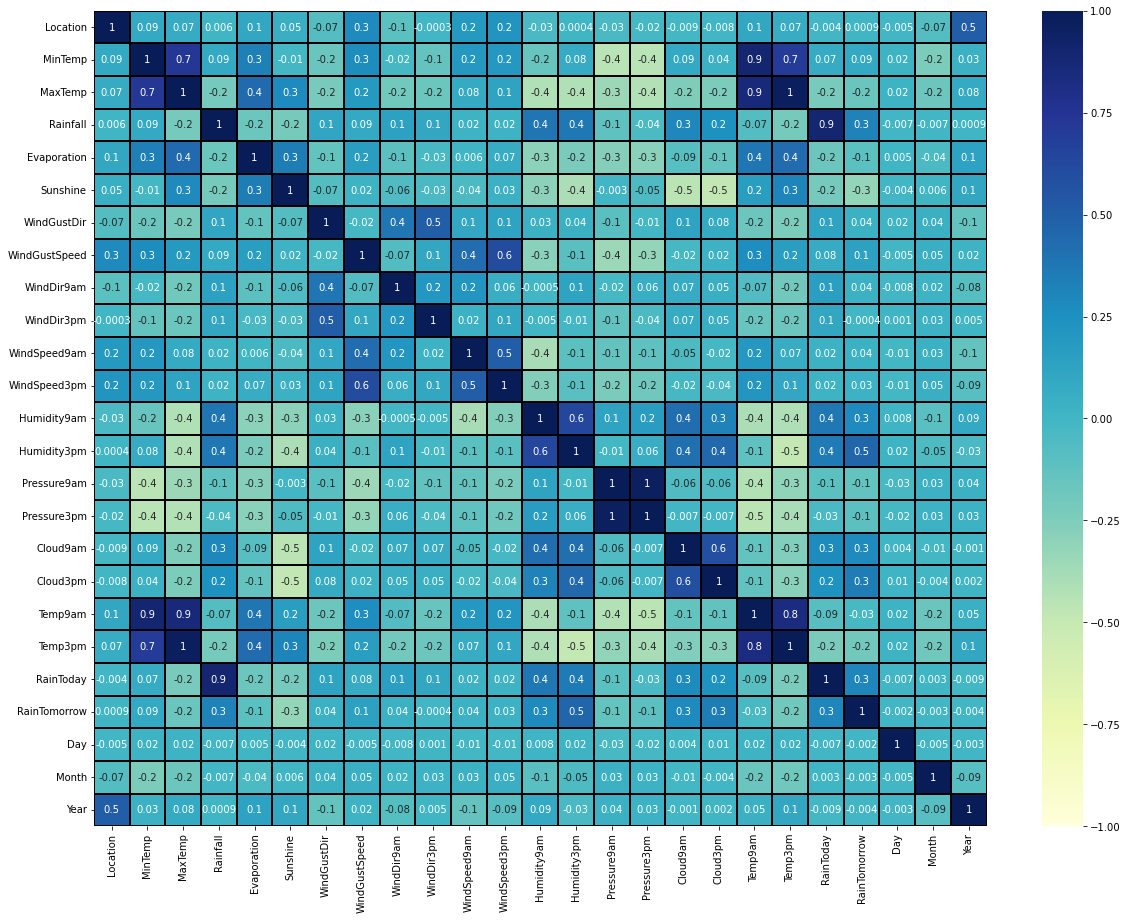

In [24]:
#Ploting Correlation using heatmap
plt.figure(figsize=(20,15))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

In [25]:
corr['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.463993
Cloud3pm         0.347508
Rainfall         0.325920
RainToday        0.302807
Cloud9am         0.283691
Humidity9am      0.283501
WindGustSpeed    0.145937
MinTemp          0.092566
WindGustDir      0.037814
WindDir9am       0.035059
WindSpeed9am     0.035010
WindSpeed3pm     0.025542
Location         0.000945
WindDir3pm      -0.000374
Day             -0.002235
Month           -0.003271
Year            -0.004300
Temp9am         -0.027001
Evaporation     -0.103875
Pressure3pm     -0.112930
Pressure9am     -0.139679
MaxTemp         -0.158587
Temp3pm         -0.201860
Sunshine        -0.312749
Name: RainTomorrow, dtype: float64

- humidy has the highest corelation with RainTomorrow

In [26]:
corr['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.903517
Humidity9am      0.386916
Humidity3pm      0.371679
RainTomorrow     0.325920
Cloud9am         0.290925
Cloud3pm         0.246313
WindDir9am       0.147439
WindGustDir      0.113333
WindDir3pm       0.098717
MinTemp          0.089705
WindGustSpeed    0.088163
WindSpeed3pm     0.020913
WindSpeed9am     0.019173
Location         0.005915
Year             0.000938
Month           -0.006811
Day             -0.007318
Pressure3pm     -0.043761
Temp9am         -0.073620
Pressure9am     -0.117805
Evaporation     -0.167338
MaxTemp         -0.207571
Sunshine        -0.212622
Temp3pm         -0.217876
Name: Rainfall, dtype: float64

- Rain today has highest relation with Rainfall followed by Humidity9am, but far difference

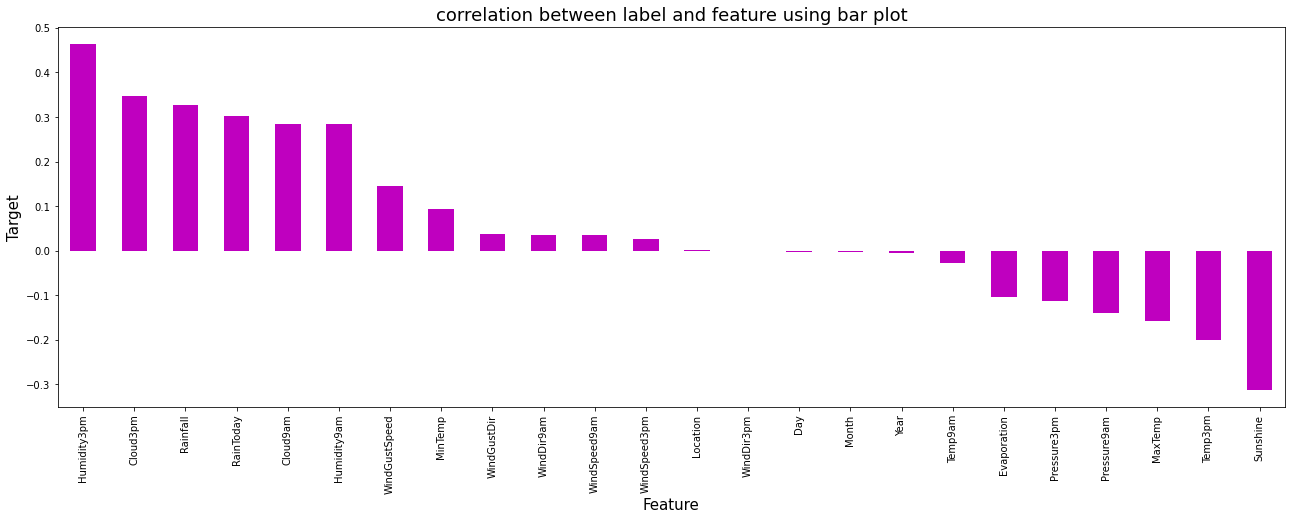

In [27]:
#### <b> Visualizing Correlation in bar plot<b>

plt.figure(figsize=(22,7))
new_df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

#### Data Preprocessing for Classification

In [28]:
X = new_df.drop("RainTomorrow", axis=1)
Y = new_df["RainTomorrow"]

- Standard Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.391645,0.069419,-0.190410,0.007121,0.274564,0.123134,1.248646,0.566335,1.317169,1.373565,...,-1.760082,-1.440880,1.468728,0.074527,-0.162254,-0.148996,-0.5353,-1.672094,1.655738,-1.770678
1,-1.391645,-1.013688,0.174696,-0.536481,0.274564,0.123134,1.457437,0.566335,-0.222773,1.596824,...,-1.253105,-1.317380,0.082301,0.074527,-0.109503,0.276985,-0.5353,-1.558323,1.655738,-1.770678
2,-1.391645,-0.020840,0.274270,-0.536481,0.274564,0.123134,1.666229,0.696806,1.317169,1.596824,...,-1.777564,-1.158594,0.082301,-1.003562,0.558678,0.089554,-0.5353,-1.444552,1.655738,-1.770678
3,-1.391645,-0.688756,0.655972,-0.536481,0.274564,0.123134,-0.630482,-1.197233,0.437202,-1.752064,...,-0.029368,-0.435235,0.082301,0.074527,0.048751,0.651848,-0.5353,-1.330782,1.655738,-1.770678
4,-1.391645,0.809542,1.369588,0.265206,0.274564,0.123134,1.248646,0.359332,-1.322732,-0.189249,...,-1.218141,-1.634952,1.064920,1.580562,-0.004000,1.197104,-0.5353,-1.217011,1.655738,-1.770678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,1.203028,-1.844070,-0.107431,-0.536481,0.274564,0.123134,-1.465650,-0.456565,0.437202,-1.528805,...,1.194369,0.887982,0.082301,0.074527,-1.357946,-0.046760,-0.5353,0.603320,-0.134393,2.169074
6403,1.203028,-1.699656,0.207888,-0.536481,0.274564,0.123134,-0.212898,-1.447408,0.437202,-1.082286,...,1.002068,0.676267,0.082301,0.074527,-1.217276,0.311064,-0.5353,0.717091,-0.134393,2.169074
6404,1.203028,-1.374724,0.473419,-0.536481,0.274564,0.123134,-0.839274,0.059046,0.437202,1.373565,...,0.565019,0.270480,0.082301,0.074527,-0.935937,0.583692,-0.5353,0.830862,-0.134393,2.169074
6405,1.203028,-0.941481,0.490015,-0.536481,0.274564,0.123134,0.413478,-0.751920,0.657194,-1.082286,...,0.285307,0.217552,-0.550314,-1.003562,-0.478760,0.566652,-0.5353,0.944633,-0.134393,2.169074


#### Multi Colinearity uisng VIF

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.639063,Location
1,9.115323,MinTemp
2,26.386865,MaxTemp
3,5.663714,Rainfall
4,1.500680,Evaporation
5,1.651206,Sunshine
6,1.642183,WindGustDir
7,2.045900,WindGustSpeed
8,1.387886,WindDir9am
9,1.485367,WindDir3pm


- High multi collinearity in features MaxTemp, Pressure9am, Pressure3pm, Temp9am, Temp3pm.

In [31]:
# Dropping Temp3pm column
X.drop("Temp3pm",axis=1,inplace=True)

In [78]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.638888,Location
1,9.073776,MinTemp
2,9.688120,MaxTemp
3,5.661767,Rainfall
4,1.498658,Evaporation
5,1.649815,Sunshine
6,1.638555,WindGustDir
7,2.041740,WindGustSpeed
8,1.386879,WindDir9am
9,1.484655,WindDir3pm


In [32]:
# Dropping Pressure9am column
X.drop("Pressure9am",axis=1,inplace=True)

In [33]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.635722,Location
1,8.951231,MinTemp
2,9.311322,MaxTemp
3,5.649758,Rainfall
4,1.486859,Evaporation
5,1.649502,Sunshine
6,1.620873,WindGustDir
7,2.024757,WindGustSpeed
8,1.362044,WindDir9am
9,1.421238,WindDir3pm


In [34]:
# Dropping Temp9am column
X.drop("Temp9am",axis=1,inplace=True)

In [35]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.634103,Location
1,4.754378,MinTemp
2,5.488565,MaxTemp
3,5.643815,Rainfall
4,1.473701,Evaporation
5,1.638491,Sunshine
6,1.619289,WindGustDir
7,1.990357,WindGustSpeed
8,1.360724,WindDir9am
9,1.421201,WindDir3pm


####  Oversampling Target Variable

In [36]:
Y.value_counts()

0    4979
1    1428
Name: RainTomorrow, dtype: int64

- Target dataset is imbalanced

In [37]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, Y = SM.fit_resample(X,Y)

In [38]:
Y.value_counts()

0    4979
1    4979
Name: RainTomorrow, dtype: int64

##### Models import

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6970, 21)
Training target vector size: (6970,)
Test feature matrix size: (2988, 21)
Test target vector size: (2988,)


#### Finding the Best Random state

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7928380187416332 on Random_state 146


#### Logistic Regression Predction

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=146, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7928380187416332


Confusion matrix of Logistics Regression : 
 [[1220  286]
 [ 333 1149]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1506
           1       0.80      0.78      0.79      1482

    accuracy                           0.79      2988
   macro avg       0.79      0.79      0.79      2988
weighted avg       0.79      0.79      0.79      2988



#### Optimum Value for KNN Classifier

In [44]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.34565577045174056
RMSE value for k=  2 is: 0.33383496391560025
RMSE value for k=  3 is: 0.3923635174844169
RMSE value for k=  4 is: 0.38591326685080307
RMSE value for k=  5 is: 0.41192076284091067
RMSE value for k=  6 is: 0.4016365450553056
RMSE value for k=  7 is: 0.42274680298939105
RMSE value for k=  8 is: 0.41313766582544226
RMSE value for k=  9 is: 0.42707874177177224
RMSE value for k=  10 is: 0.41956821050503684
RMSE value for k=  11 is: 0.4278616548794693
RMSE value for k=  12 is: 0.41876979263499997
RMSE value for k=  13 is: 0.4251151509488518
RMSE value for k=  14 is: 0.42116050545139555
RMSE value for k=  15 is: 0.42472134340629275
RMSE value for k=  16 is: 0.4235377237987061
RMSE value for k=  17 is: 0.4309790852089579
RMSE value for k=  18 is: 0.42942319895631414
RMSE value for k=  19 is: 0.4359973717420752
RMSE value for k=  20 is: 0.43175492577431956
RMSE value for k=  21 is: 0.4386757484930417
RMSE value for k=  22 is: 0.43522909383812947
RMSE 

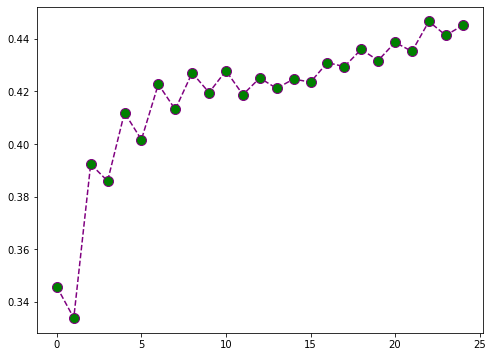

In [45]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='purple', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

RMSE is min for K=2,Value = 0.33383496391560025, and later it is tempting to increase

##### Other Classification Algorithms

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8540829986613119


Confusion matrix : 
 [[1263  243]
 [ 193 1289]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1506
           1       0.84      0.87      0.86      1482

    accuracy                           0.85      2988
   macro avg       0.85      0.85      0.85      2988
weighted avg       0.85      0.85      0.85      2988





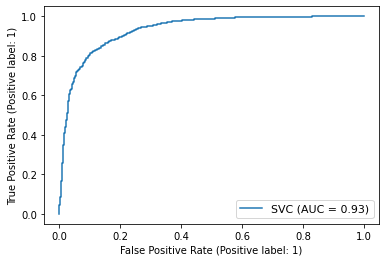

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7526773761713521


Confusion matrix : 
 [[1210  296]
 [ 443 1039]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.80      0.77      1506
           1       0.78      0.70      0.74      1482

    accuracy                           0.75      2988
   macro avg       0.76      0.75      0.75      2988
weighted avg       0.75      0.75      0.75      2988





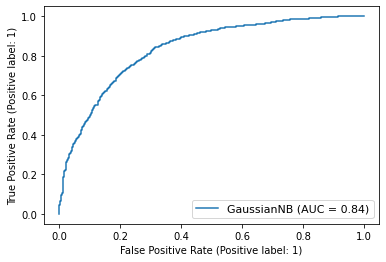

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.8082329317269076


Confusion matrix : 
 [[1214  292]
 [ 281 1201]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1506
           1       0.80      0.81      0.81      1482

    accuracy                           0.81      2988
   macro avg       0.81      0.81      0.81      2988
weighted avg       0.81      0.81      0.81      2988





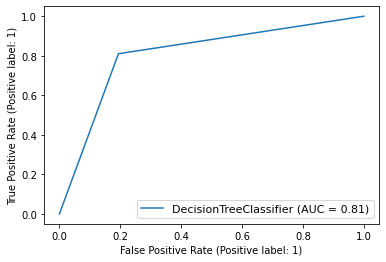

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=2) is


Accuracy Score :
 0.8885542168674698


Confusion matrix : 
 [[1274  232]
 [ 101 1381]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.85      0.88      1506
           1       0.86      0.93      0.89      1482

    accuracy                           0.89      2988
   macro avg       0.89      0.89      0.89      2988
weighted avg       0.89      0.89      0.89      2988





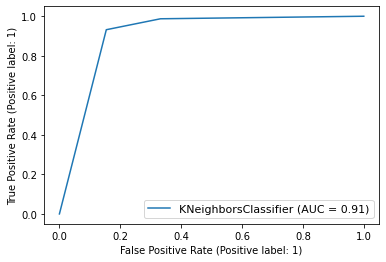

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.9093038821954484


Confusion matrix : 
 [[1349  157]
 [ 114 1368]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1506
           1       0.90      0.92      0.91      1482

    accuracy                           0.91      2988
   macro avg       0.91      0.91      0.91      2988
weighted avg       0.91      0.91      0.91      2988





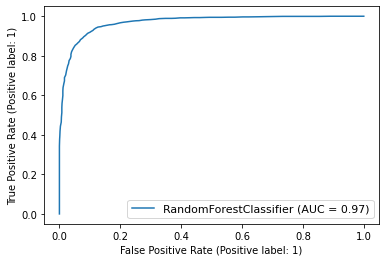

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.9243641231593038


Confusion matrix : 
 [[1355  151]
 [  75 1407]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      1506
           1       0.90      0.95      0.93      1482

    accuracy                           0.92      2988
   macro avg       0.93      0.92      0.92      2988
weighted avg       0.93      0.92      0.92      2988





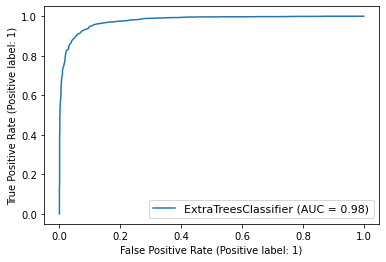

In [48]:
from sklearn.metrics import plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 2),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('============================================================================================================')


-  ExtraTreesClassifier gives the good accuracy and good F1 score

In [51]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.6997992  0.65160643 0.6435743  0.75439478 0.82169764]
Mean Score : 0.7142144671100272
Std deviation : 0.06676030266057742




Cross Validation Score SVC() :

Score : [0.70381526 0.57178715 0.67369478 0.78955299 0.80914114]
Mean Score : 0.7095982624622044
Std deviation : 0.08557563675403214




Cross Validation Score GaussianNB() :

Score : [0.72640562 0.69628514 0.66666667 0.73078855 0.7579106 ]
Mean Score : 0.715611315175317
Std deviation : 0.03132147641750061




Cross Validation Score DecisionTreeClassifier() :

Score : [0.67871486 0.4934739  0.63955823 0.72024108 0.80411853]
Mean Score : 0.6672213212468154
Std deviation : 0.10260356507610746




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.67821285 0.58483936 0.70381526 0.76192868 0.79206429]
Mean Score : 0.7041720876474254
Std deviation : 0.07207658806501072




Cross Validation Score RandomForestClassifier() :

Score : [0.60190763 0.57228916 0

- ExtraTreesClassifier gives the good cross validation score also

#### Hyper Parameter Tuning : GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [54]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.782 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.770 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.787 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.781 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [55]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'n_estimators': 60}

In [56]:
Final_mod = ExtraTreesClassifier(bootstrap=True,criterion='entropy',n_estimators= 60, max_depth=40 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.9082998661311914


#### ROC AUC Curve  of Final Model

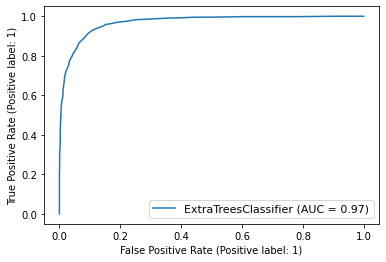

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.9085251436897483


In [57]:

from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

In [58]:
#####  Saving Model Rain Prediction Classification - Will Rain Tomorrow?

import joblib
joblib.dump(Final_mod,'WillRainTomorrow.pkl')

['WillRainTomorrow.pkl']

###  Regression Problem Prediction Of Rainfall

In [59]:
new_df.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.470004,1.85464,2.1555,13,3.806662,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.000000,1.85464,2.1555,14,3.806662,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008


- Feature and Label split

In [60]:
x_ = new_df.drop("Rainfall", axis=1)
y_ = new_df["Rainfall"]

In [61]:
####  Applying Standard SCaler

In [62]:
scaler = StandardScaler()
x_ = pd.DataFrame(scaler.fit_transform(x_), columns=x_.columns)
x_

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.391645,0.069419,-0.190410,0.274564,0.123134,1.248646,0.566335,1.317169,1.373565,0.824263,...,-1.440880,1.468728,0.074527,-0.162254,-0.148996,-0.5353,-0.535541,-1.672094,1.655738,-1.770678
1,-1.391645,-1.013688,0.174696,0.274564,0.123134,1.457437,0.566335,-0.222773,1.596824,-0.633137,...,-1.317380,0.082301,0.074527,-0.109503,0.276985,-0.5353,-0.535541,-1.558323,1.655738,-1.770678
2,-1.391645,-0.020840,0.274270,0.274564,0.123134,1.666229,0.696806,1.317169,1.596824,0.774714,...,-1.158594,0.082301,-1.003562,0.558678,0.089554,-0.5353,-0.535541,-1.444552,1.655738,-1.770678
3,-1.391645,-0.688756,0.655972,0.274564,0.123134,-0.630482,-1.197233,0.437202,-1.752064,0.255945,...,-0.435235,0.082301,0.074527,0.048751,0.651848,-0.5353,-0.535541,-1.330782,1.655738,-1.770678
4,-1.391645,0.809542,1.369588,0.274564,0.123134,1.248646,0.359332,-1.322732,-0.189249,-0.155825,...,-1.634952,1.064920,1.580562,-0.004000,1.197104,-0.5353,-0.535541,-1.217011,1.655738,-1.770678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,1.203028,-1.844070,-0.107431,0.274564,0.123134,-1.465650,-0.456565,0.437202,-1.528805,0.412493,...,0.887982,0.082301,0.074527,-1.357946,-0.046760,-0.5353,-0.535541,0.603320,-0.134393,2.169074
6403,1.203028,-1.699656,0.207888,0.274564,0.123134,-0.212898,-1.447408,0.437202,-1.082286,0.412493,...,0.676267,0.082301,0.074527,-1.217276,0.311064,-0.5353,-0.535541,0.717091,-0.134393,2.169074
6404,1.203028,-1.374724,0.473419,0.274564,0.123134,-0.839274,0.059046,0.437202,1.373565,0.070789,...,0.270480,0.082301,0.074527,-0.935937,0.583692,-0.5353,-0.535541,0.830862,-0.134393,2.169074
6405,1.203028,-0.941481,0.490015,0.274564,0.123134,0.413478,-0.751920,0.657194,-1.082286,0.412493,...,0.217552,-0.550314,-1.003562,-0.478760,0.566652,-0.5353,-0.535541,0.944633,-0.134393,2.169074


#### VIF and multi Colinearity of Rain Fall

In [63]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_.values,i)
              for i in range(len(x_.columns))]
vif["Features"] = x_.columns

# Let's check the values
vif

,VIF values,Features
0,1.645825,Location
1,9.122295,MinTemp
2,26.404474,MaxTemp
3,1.500675,Evaporation
4,1.668699,Sunshine
5,1.644396,WindGustDir
6,2.096974,WindGustSpeed
7,1.387402,WindDir9am
8,1.487067,WindDir3pm
9,1.831987,WindSpeed9am


high multicolinearity exist in MaxTemp, Temp9am, Temp3pm, Pressure9am,Pressure3pm.

In [65]:
# Dropping MaxTemp column
x_.drop("MaxTemp",axis=1,inplace=True)

In [66]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_.values,i)
              for i in range(len(x_.columns))]
vif["Features"] = x_.columns

# Let's check the values
vif

,VIF values,Features
0,1.645783,Location
1,9.112347,MinTemp
2,1.497097,Evaporation
3,1.664762,Sunshine
4,1.643461,WindGustDir
5,2.091132,WindGustSpeed
6,1.384837,WindDir9am
7,1.485846,WindDir3pm
8,1.829850,WindSpeed9am
9,1.909752,WindSpeed3pm


In [67]:
# Dropping Pressure9am column
x_.drop("Pressure9am",axis=1,inplace=True)

In [68]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_.values,i)
              for i in range(len(x_.columns))]
vif["Features"] = x_.columns

# Let's check the values
vif

,VIF values,Features
0,1.642992,Location
1,8.973909,MinTemp
2,1.484011,Evaporation
3,1.663855,Sunshine
4,1.627961,WindGustDir
5,2.072546,WindGustSpeed
6,1.361968,WindDir9am
7,1.426597,WindDir3pm
8,1.819386,WindSpeed9am
9,1.901187,WindSpeed3pm


In [69]:
# Dropping Temp9am column
x_.drop("Temp9am",axis=1,inplace=True)

In [70]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_.values,i)
              for i in range(len(x_.columns))]
vif["Features"] = x_.columns

# Let's check the values
vif

,VIF values,Features
0,1.641783,Location
1,5.189058,MinTemp
2,1.471919,Evaporation
3,1.649913,Sunshine
4,1.623614,WindGustDir
5,2.053460,WindGustSpeed
6,1.360162,WindDir9am
7,1.426337,WindDir3pm
8,1.809102,WindSpeed9am
9,1.859989,WindSpeed3pm


- VIF reduced all, in to optimum level

In [73]:
# Lets ckeck the feature importance using Random Forest Regressor

rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
importances = pd.DataFrame({'Features':x_.columns, 'Importance':np.round(rfr.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
Cloud9am,0.305
WindDir3pm,0.067
RainToday,0.064
Pressure3pm,0.047
WindGustSpeed,0.043
Cloud3pm,0.043
Sunshine,0.040
Humidity3pm,0.039
Day,0.037


#### Train Test Split of Regression Model

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(x_, y_, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4484, 21)
Training target vector size: (4484,)
Test feature matrix size: (1923, 21)
Test target vector size: (1923,)


#### Best Random State 

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(x_, y_, random_state=i, test_size=.3)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8455175231701082 on Random_state 165


#### LR Base Model

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_, y_, random_state=165, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted Wins:',y_pred)
print('\n')
print('Actual Wins:',Y_test)

Predicted Wins: [0.05845498 0.03831742 1.93102091 ... 1.96000721 0.08827272 0.10485988]


Actual Wins: 3746    0.000000
7668    0.000000
982     1.526056
5603    0.000000
5732    0.000000
          ...   
63      0.182322
6658    0.470004
930     2.433613
852     0.000000
2202    0.336472
Name: Rainfall, Length: 1923, dtype: float64


#### LR Evaluation Matrix

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.18562460227402108
Mean squared error : 0.1099847283117598
Root Mean Squared Error: 0.3316394553001193


 R2 Score :
0.8455175231701081


In [82]:
#### Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, x_, y_, cv =5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.8203199786433792


#### Appying other Regression Models

In [87]:
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor
rf = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 



 Error of  RandomForestRegressor(max_depth=25, n_estimators=70) :
Mean absolute error : 0.17215959601357433
Mean squared error : 0.1029138163608923
Root Mean Squared Error: 0.3208018334749543


 R2 Score :
0.8554491928517372


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 0.185624945195202
Mean squared error : 0.10998475759571356
Root Mean Squared Error: 0.33163949945040255


 R2 Score :
0.8455174820384186


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.2202353063946789
Mean squared error : 0.21046482308954345
Root Mean Squared Error: 0.4587644527309668


 R2 Score :
0.7043850754963288


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 0.1817445429128188
Mean squared error : 0.10730474601624301
Root Mean Squared Error: 0.32757403135206403


 R2 Score :
0.849281775800693


 Error of  GradientBoostingRegressor(max_depth=25) :
Mean absolute error : 0.21605981265417273
Mean squared error : 0.20028145340212639
Root Mean Squared Error: 0.4475281

In [88]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, x_, y_, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor(max_depth=25, n_estimators=70) :

Mean CV Score : 0.8178700901804181


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.8203199704852999


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.6370348763387511


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.8242780362139467


Cross Validation Score : GradientBoostingRegressor(max_depth=25) :

Mean CV Score : 0.6654216122358514


Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_

Among all Models Random Forest Regressor gave us maximum R2 score of 0.854 and minimum RMSE value of 0.0.320. So We will perform Hyper Parameter Tuning on Random Forest Regressor.

#### Hyper Parameter Tuning : GridSearchCV

In [89]:
from sklearn.model_selection import GridSearchCV

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10],'criterion':['mse','mae'],
             'max_features':["auto","sqrt","log2"]}

In [93]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [94]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=3)

#### Final Model

In [96]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=60 ,criterion = 'mse', max_depth= 20, max_features = 'auto',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.1696346893409096
Mean squared error : 0.1033209299732801
Root Mean Squared Error: 0.3214357322596231


 R2 Score of Final Model :
0.8548773687434431




 True Values Vs Predicted Value plot :


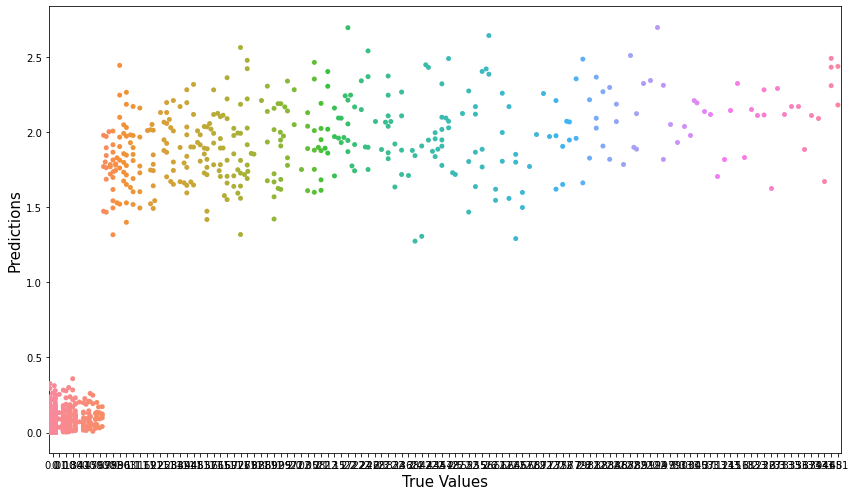

In [98]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

In [99]:
import joblib
joblib.dump(Final_mod,'Rainfall.pkl')

['Rainfall.pkl']